In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Define the model architecture
model = keras.Sequential(
    [
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [9]:

# Compile the model with SGD optimizer
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=0.01), metrics=["accuracy"])

# Train the model
history_sgd = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))

# Evaluate the model with ADAM optimizer
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])
history_adam = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))

# Evaluate the model with RMSprop optimizer
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.RMSprop(learning_rate=0.001), metrics=["accuracy"])
history_rmsprop = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))


Epoch 1/20
469/469 [==============================] - 33s 70ms/step - loss: 0.9665 - accuracy: 0.7744 - val_loss: 0.3735 - val_accuracy: 0.8984
Epoch 2/20
469/469 [==============================] - 30s 64ms/step - loss: 0.3445 - accuracy: 0.9006 - val_loss: 0.2904 - val_accuracy: 0.9162
Epoch 3/20
469/469 [==============================] - 33s 69ms/step - loss: 0.2891 - accuracy: 0.9159 - val_loss: 0.2524 - val_accuracy: 0.9259
Epoch 4/20
469/469 [==============================] - 30s 64ms/step - loss: 0.2544 - accuracy: 0.9263 - val_loss: 0.2286 - val_accuracy: 0.9336
Epoch 5/20
469/469 [==============================] - 31s 67ms/step - loss: 0.2295 - accuracy: 0.9328 - val_loss: 0.2045 - val_accuracy: 0.9423
Epoch 6/20
469/469 [==============================] - 30s 65ms/step - loss: 0.2077 - accuracy: 0.9389 - val_loss: 0.1881 - val_accuracy: 0.9444
Epoch 7/20
469/469 [==============================] - 30s 64ms/step - loss: 0.1907 - accuracy: 0.9441 - val_loss: 0.1728 - val_accuracy:

313/313 [==============================] - 2s 6ms/step - loss: 0.0607 - accuracy: 0.9894
Test accuracy: 0.9894000291824341


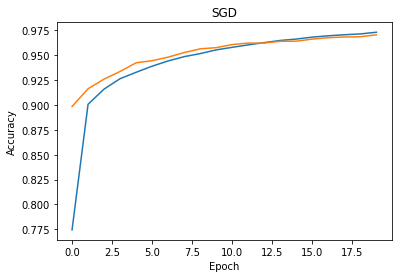

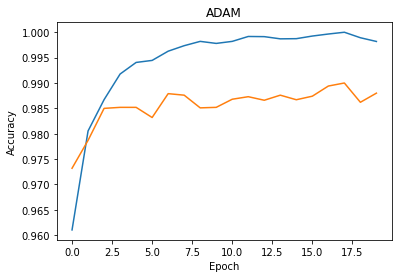

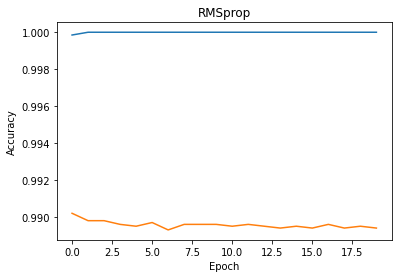

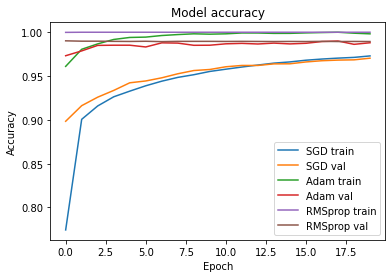

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print test accuracy
print("Test accuracy:", test_acc)

# Plot the training accuracy and validation accuracy
plt.title("SGD")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.plot(history_sgd.history["accuracy"])
plt.plot(history_sgd.history["val_accuracy"])
plt.show()
plt.title("ADAM")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.plot(history_adam.history["accuracy"])
plt.plot(history_adam.history["val_accuracy"])
plt.show()
plt.title("RMSprop")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.plot(history_rmsprop.history["accuracy"])
plt.plot(history_rmsprop.history["val_accuracy"])
plt.show()

plt.plot(history_sgd.history["accuracy"])
plt.plot(history_sgd.history["val_accuracy"])

plt.plot(history_adam.history["accuracy"])
plt.plot(history_adam.history["val_accuracy"])

plt.plot(history_rmsprop.history["accuracy"])
plt.plot(history_rmsprop.history["val_accuracy"])

plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["SGD train", "SGD val", "Adam train", "Adam val", "RMSprop train", "RMSprop val"], loc="best")
plt.show()